# Sentiment-Analysis

### Model Used in this Sentimental analysis

- VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
- Roberta Pretrained Model from 🤗
- Huggingface Pipeline

**Import the modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

#uncommand all the nltk packages
import nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('vader_lexicon')

**Read the dataset**

In [2]:
data = pd.read_csv('Reviews.csv')
print(data.shape)
data = data.head(400000)
print(data.shape)

(568454, 10)
(400000, 10)


**Data Exploration**

In [3]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
399995,399996,B002IEVJRY,A3PJZ8TU8FDQ1K,Jared Castle,2,3,5,1340841600,Only 100 calories!? The rich flavor will surpr...,"At 100 calories per can, illy issimo Cappuccin..."
399996,399997,B002IEVJRY,AXAJXJZUL2J5P,D. Scott,2,3,4,1339977600,"Yes, it's canned, but it's not bad",There's no way you are ever going to get the r...
399997,399998,B002IEVJRY,A3QS4WWC1LCA6H,"Eric C. Sedensky ""late-to-jazz musician""",2,3,4,1339545600,"Not bad, ummm, no, good!","I'm not a big cold coffee drinker, but occasio..."
399998,399999,B002IEVJRY,A1VQI32QPYXU6F,"Josh Strickland ""J. Strickland""",2,3,1,1339545600,Ehh....,"I love drinking coffee, Cappuccinos, and even ..."


In [4]:
data.info

<bound method DataFrame.info of             Id   ProductId          UserId  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW   
1            2  B00813GRG4  A1D87F6ZCVE5NK   
2            3  B000LQOCH0   ABXLMWJIXXAIN   
3            4  B000UA0QIQ  A395BORC6FGVXV   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T   
...        ...         ...             ...   
399995  399996  B002IEVJRY  A3PJZ8TU8FDQ1K   
399996  399997  B002IEVJRY   AXAJXJZUL2J5P   
399997  399998  B002IEVJRY  A3QS4WWC1LCA6H   
399998  399999  B002IEVJRY  A1VQI32QPYXU6F   
399999  400000  B002IEVJRY  A3S3R88HA0HZG3   

                                     ProfileName  HelpfulnessNumerator  \
0                                     delmartian                     1   
1                                         dll pa                     0   
2                Natalia Corres "Natalia Corres"                     1   
3                                           Karl                     3   
4                  Michael D. Bigham "M. Wass

In [5]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
data['Score']

0         5
1         1
2         4
3         2
4         5
         ..
399995    5
399996    4
399997    4
399998    1
399999    5
Name: Score, Length: 400000, dtype: int64

In [7]:
data['Score'].value_counts()

Score
5    254810
4     56905
1     37074
3     30062
2     21149
Name: count, dtype: int64

## **Quick EDA**

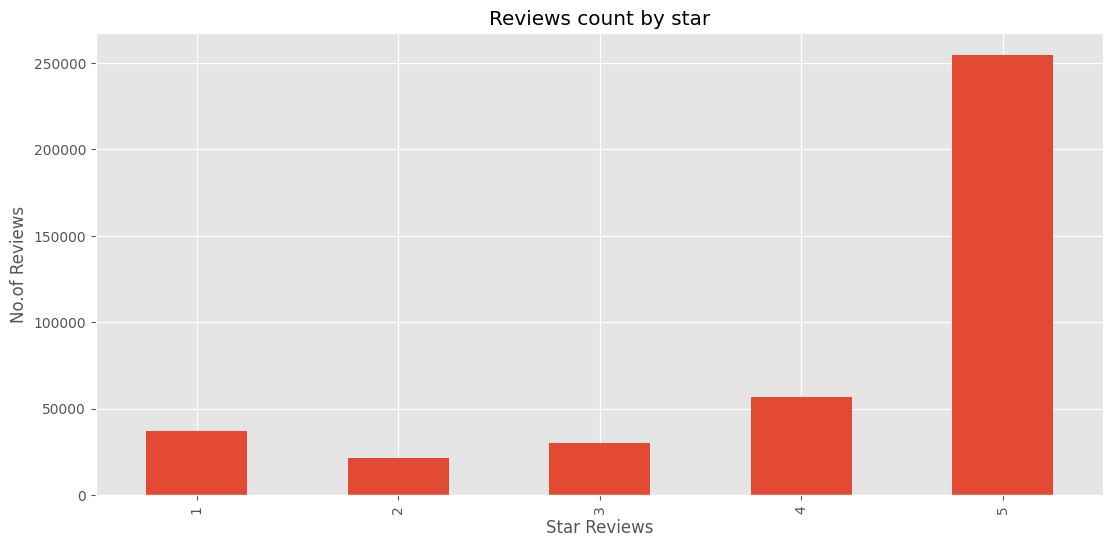

In [8]:
ndata = data['Score'].value_counts().sort_index() \
        .plot(kind = 'bar' ,
              title = "Reviews count by star" ,
              figsize = (13,6))
plt.xlabel('Star Reviews')
plt.ylabel('No.of Reviews')
plt.show()

## **Basic NLTK - Natural Language Tool Kit**

In [9]:
example = data['Text'][19]
print(example)

Candy was delivered very fast and was purchased at a reasonable price.  I was home bound and unable to get to a store so this was perfect for me.


In [10]:
tokens = nltk.word_tokenize(example)
print(tokens)

['Candy', 'was', 'delivered', 'very', 'fast', 'and', 'was', 'purchased', 'at', 'a', 'reasonable', 'price', '.', 'I', 'was', 'home', 'bound', 'and', 'unable', 'to', 'get', 'to', 'a', 'store', 'so', 'this', 'was', 'perfect', 'for', 'me', '.']


In [11]:
tagged = nltk.pos_tag(tokens)
print(tagged)

[('Candy', 'NNP'), ('was', 'VBD'), ('delivered', 'VBN'), ('very', 'RB'), ('fast', 'RB'), ('and', 'CC'), ('was', 'VBD'), ('purchased', 'VBN'), ('at', 'IN'), ('a', 'DT'), ('reasonable', 'JJ'), ('price', 'NN'), ('.', '.'), ('I', 'PRP'), ('was', 'VBD'), ('home', 'VBN'), ('bound', 'NN'), ('and', 'CC'), ('unable', 'JJ'), ('to', 'TO'), ('get', 'VB'), ('to', 'TO'), ('a', 'DT'), ('store', 'NN'), ('so', 'IN'), ('this', 'DT'), ('was', 'VBD'), ('perfect', 'NN'), ('for', 'IN'), ('me', 'PRP'), ('.', '.')]


In [12]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (PERSON Candy/NNP)
  was/VBD
  delivered/VBN
  very/RB
  fast/RB
  and/CC
  was/VBD
  purchased/VBN
  at/IN
  a/DT
  reasonable/JJ
  price/NN
  ./.
  I/PRP
  was/VBD
  home/VBN
  bound/NN
  and/CC
  unable/JJ
  to/TO
  get/VB
  to/TO
  a/DT
  store/NN
  so/IN
  this/DT
  was/VBD
  perfect/NN
  for/IN
  me/PRP
  ./.)


## **VADER Seniment Scoring**

We will use NLTK's `SentimentIntensityAnalyzer` to get the `neg/neu/pos` scores of the text.

- This uses a "bag of words" approach:
    - Stop words are removed
    - Each word is scored and combined to a total score.

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [15]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [16]:
sia.polarity_scores('worst experience , ntg was good')

{'neg': 0.41, 'neu': 0.3, 'pos': 0.29, 'compound': -0.296}

In [17]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.6077}

In [18]:
sia.polarity_scores(data['Text'][7])

{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}

In [19]:
sia.polarity_scores(data['Text'][27])

{'neg': 0.04, 'neu': 0.808, 'pos': 0.152, 'compound': 0.5956}

In [20]:
sia.polarity_scores(data['Text'][29])

{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [21]:
sia.polarity_scores(data['Text'][100000])

{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.9187}

In [22]:
sia.polarity_scores(data['Text'][200000])

{'neg': 0.065, 'neu': 0.882, 'pos': 0.053, 'compound': -0.3506}

In [23]:
sia.polarity_scores(data['Text'][5])

{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}

In [24]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/400000 [00:00<?, ?it/s]

In [25]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(data, how='left')

In [26]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [27]:
negval = vaders['neg']
negval

0         0.000
1         0.138
2         0.091
3         0.000
4         0.000
          ...  
399995    0.016
399996    0.030
399997    0.152
399998    0.026
399999    0.056
Name: neg, Length: 400000, dtype: float64

In [28]:
negval.sort_values()

0         0.000
158477    0.000
158478    0.000
158479    0.000
158480    0.000
          ...  
58834     0.550
318319    0.550
157067    0.602
323586    0.720
59774     0.939
Name: neg, Length: 400000, dtype: float64

In [29]:
posval = vaders['pos']
posval

0         0.305
1         0.000
2         0.155
3         0.000
4         0.448
          ...  
399995    0.117
399996    0.217
399997    0.104
399998    0.177
399999    0.128
Name: pos, Length: 400000, dtype: float64

In [30]:
posval.sort_values()

246780    0.000
89166     0.000
190342    0.000
190327    0.000
36169     0.000
          ...  
349136    0.770
79134     0.778
234392    0.791
256424    0.793
257809    0.866
Name: pos, Length: 400000, dtype: float64

In [31]:
neuval = vaders['neu']
neuval

0         0.695
1         0.862
2         0.754
3         1.000
4         0.552
          ...  
399995    0.867
399996    0.753
399997    0.745
399998    0.797
399999    0.816
Name: neu, Length: 400000, dtype: float64

In [32]:
neuval.sort_values()

388831    0.000
324249    0.000
188001    0.000
299605    0.000
59774     0.044
          ...  
27314     1.000
386583    1.000
285749    1.000
232984    1.000
128025    1.000
Name: neu, Length: 400000, dtype: float64

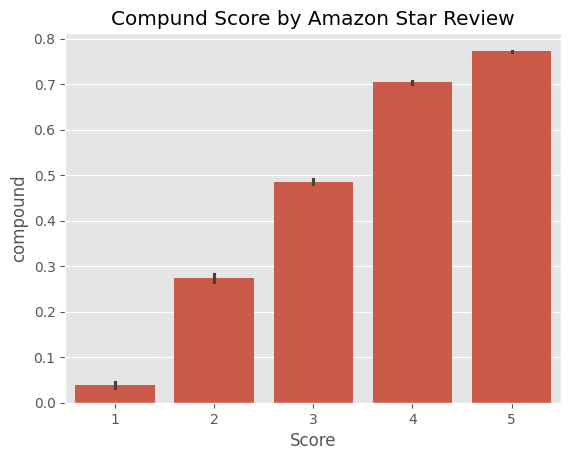

In [33]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

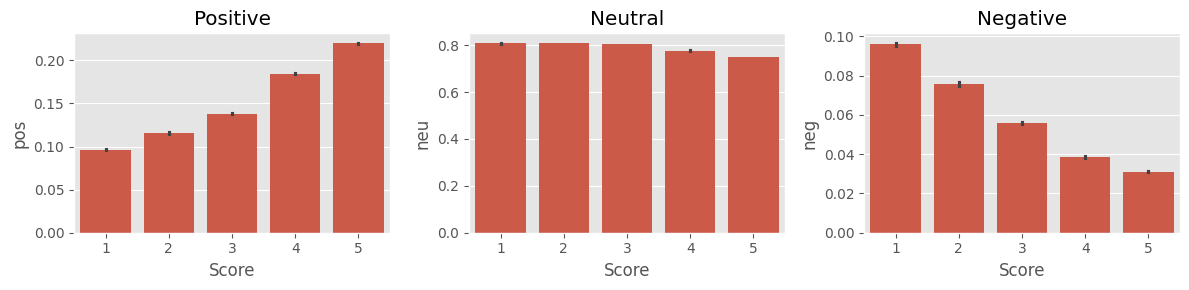

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [35]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [41]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [42]:
# VADER results on example
print(example)
sia.polarity_scores(example)

Candy was delivered very fast and was purchased at a reasonable price.  I was home bound and unable to get to a store so this was perfect for me.


{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.6077}

In [43]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.005554635, 'roberta_neu': 0.032469265, 'roberta_pos': 0.9619762}


In [44]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [49]:
data = data.head(1000)

In [51]:
import pandas as pd
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

# Function to get polarity scores from RoBERTa model
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        output = model(**encoded_text)
    scores = output.logits[0].detach().numpy()
    scores = softmax(scores)
    return {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }

# Function to get polarity scores from VADER
def get_vader_scores(text, sia):
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {f"vader_{key}": value for key, value in vader_result.items()}
    return vader_result_rename

# Assuming 'data' is your DataFrame and 'sia' is your VADER sentiment intensity analyzer
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['Text']
        myid = row['Id']
        
        # Get VADER scores
        vader_result_rename = get_vader_scores(text, sia)
        
        # Get RoBERTa scores
        roberta_result = polarity_scores_roberta(text)
        
        # Merge results
        both = {**vader_result_rename, **roberta_result}
        
        # Save results
        res[myid] = both
        
    except RuntimeError:
        print(f'Broke for id {myid}')

# Convert results to DataFrame
results_df = pd.DataFrame(res).T.reset_index().rename(columns={'index': 'Id'}).merge(data, how='left')

# Save or analyze 'vaders' DataFrame as needed


  8%|██████▌                                                                         | 82/1000 [00:24<02:54,  5.26it/s]

Broke for id 83


 19%|██████████████▊                                                                | 188/1000 [00:52<02:26,  5.53it/s]

Broke for id 187


 53%|█████████████████████████████████████████▋                                     | 528/1000 [02:38<03:27,  2.27it/s]

Broke for id 529


 54%|██████████████████████████████████████████▌                                    | 539/1000 [02:41<01:55,  4.00it/s]

Broke for id 540


 74%|██████████████████████████████████████████████████████████▊                    | 745/1000 [03:51<02:08,  1.99it/s]

Broke for id 746


 86%|████████████████████████████████████████████████████████████████████▎          | 864/1000 [04:29<00:33,  4.01it/s]

Broke for id 863


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:18<00:00,  3.14it/s]


In [53]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(data, how='left')

## **Combine and compare**

In [54]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

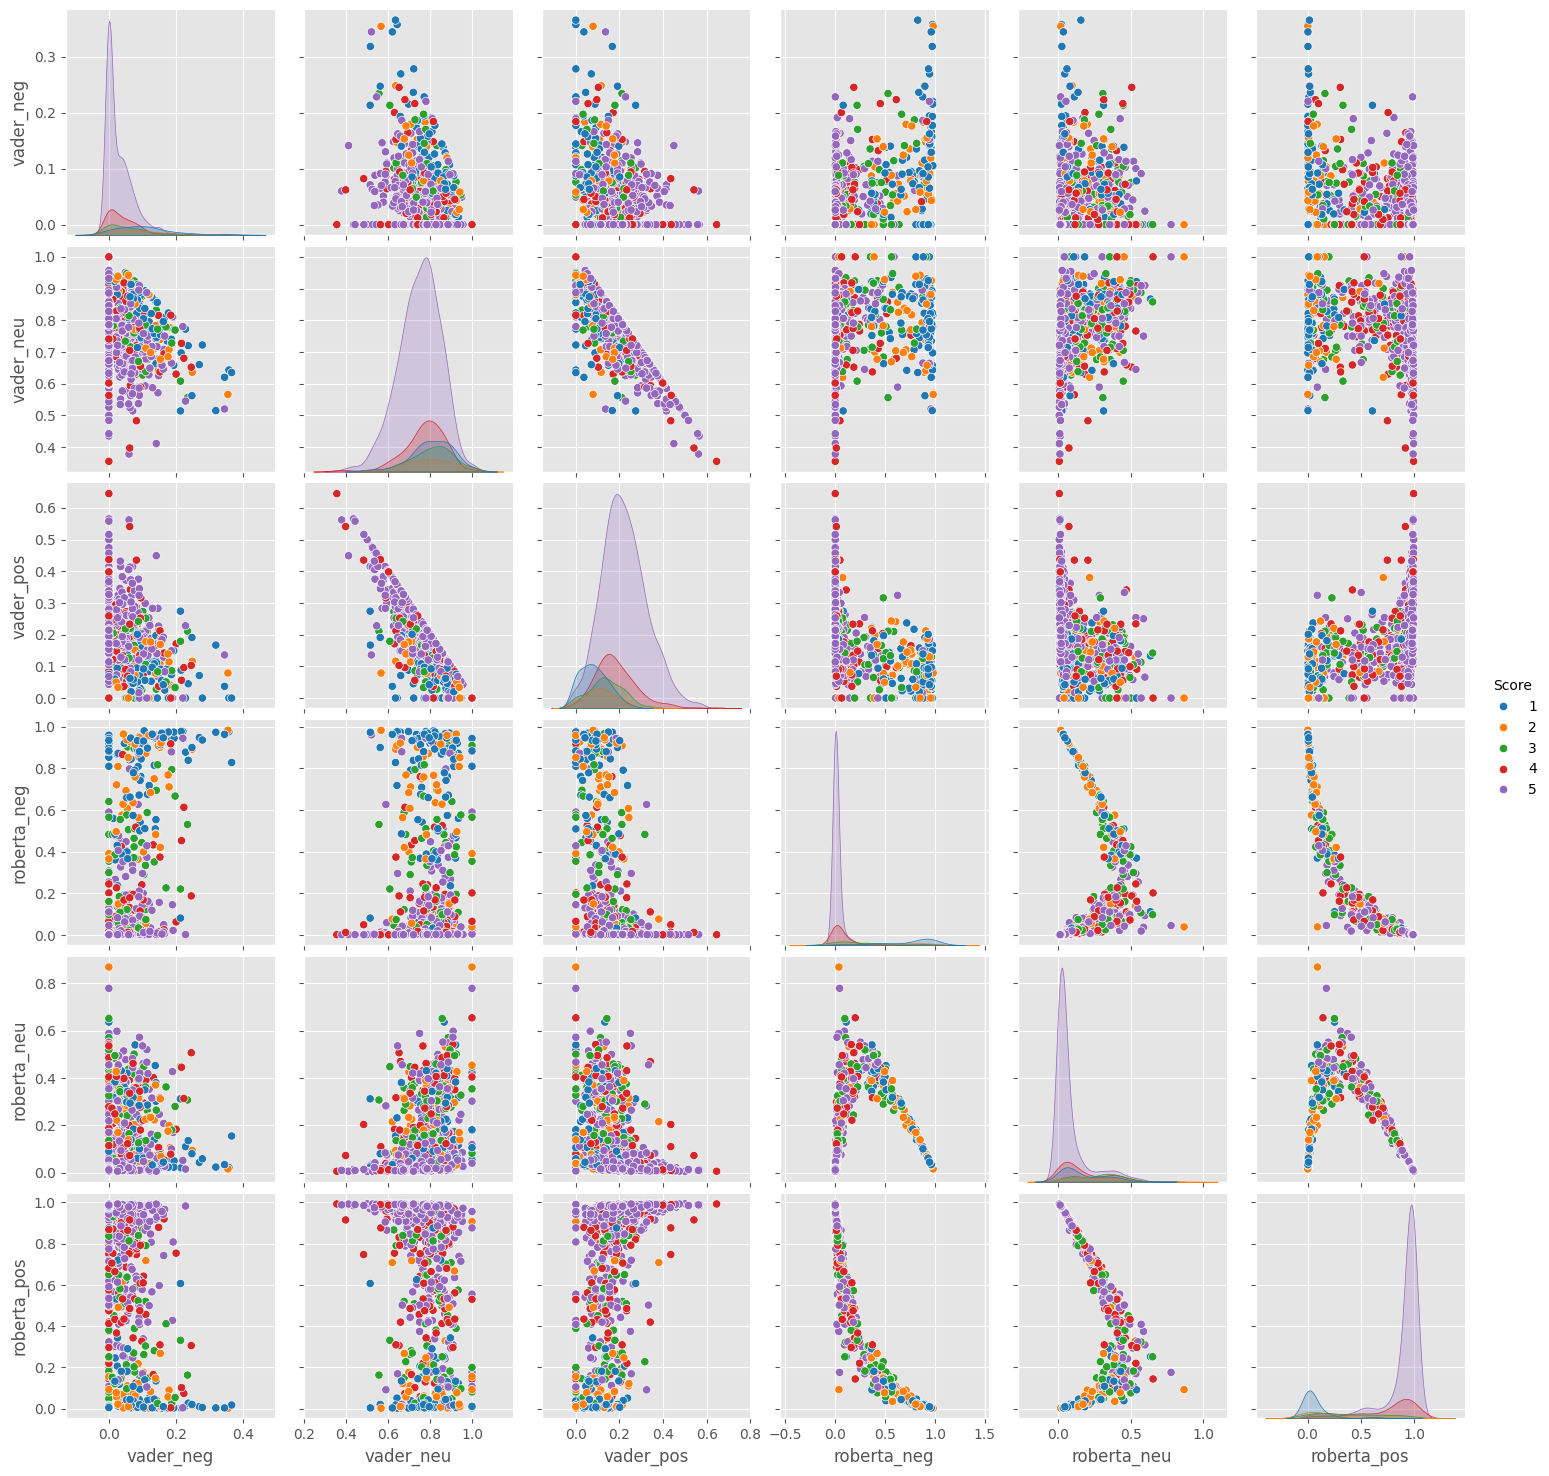

In [55]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## **Review examples**

In [56]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [57]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [58]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [59]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## **The Transformers Pipeline**

In [1]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\Reception\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Reception\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [2]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [3]:
sent_pipeline('I like sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9985498785972595}]

In [4]:
sent_pipeline('this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault')

[{'label': 'NEGATIVE', 'score': 0.9980344176292419}]